## Q1. Indian ITians are  less satified owing to low CTC than Rest of the world.

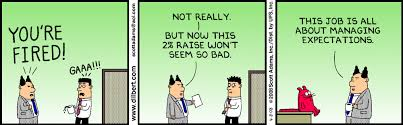

### Business Understanding

To awnser above question, lets first understand the relationships of variables with salary and coding language across demographics.

To get started let's read in the necessary libraries and take a look at some of our columns of interest.

In [1]:
import numpy as np
import pandas as pd

#to handle datasets
from collections import Counter

# to make plots
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
#import Barchart.py as chart
%matplotlib inline



### Data Understanding

First, we provide a general view to our data. for example, what kind of developer they are and where are they come from. Also, let's have a quick look on their employment status and how they think about their salary

In [2]:
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

#df.head()

In [3]:
#schema.head()

In [4]:
# Working with just quantitative variables is actually pretty straightforward for most supervised learning techniques
# Let's just start and iterate on our findings
# Let's just fit something and go from there

#df.describe()

In [5]:
# The above are variables that python is treating as numeric variables, and therefore, we 
# could send them into our linear model blindly to predict the response
# Let's take a quick look at our data first

#df.hist();

In [6]:
# Data Understanding
def display_bar_chart(df, column, title):
    '''
    
    Displays a bar chart with a title
    
    Parameters:
    df: a dataframe
    column: the column which we want to show
    title: the title of the chart
    
    Returns:
    None
    
    '''
    status_vals = df[column].value_counts()
    (status_vals[:30]/df.shape[0]).plot(kind="bar");
    plt.title(title);

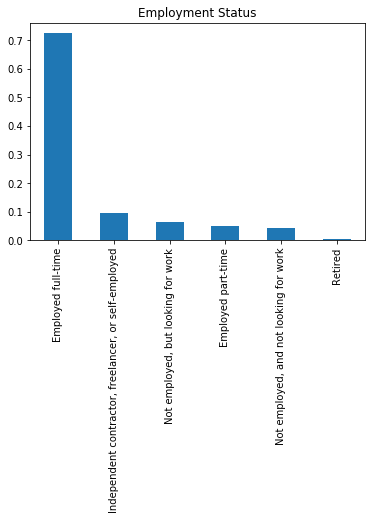

In [7]:
#Display various Employement status
display_bar_chart(df, "Employment", "Employment Status")

### Data preparation


#### Limitation of machine computation

- Developer Survey is huge and it has 85 columns. Schema file has description to every survey column.
- It takes time run code on machine with limited computational power.

#### Relevant Data for analysis
- Most of the columns are not requried to awnser business questions. Therefore only 24 relevant columns are kept.
- Also, Interest is to take only respondent who Either are employed fulltime OR those who contractor/freelancer/self-employed

In [8]:
def data_preparation(df):
    '''
    
    Return useful columns with query condition
    
    Parameters:
    df: a raw data dataframe
    
    Returns:
    df_relevant: a filtered dataframe with only relevant columns
    
    '''
    #Get some relevant columns for analysis
    cols = ['Respondent','MainBranch','Employment','Country','EdLevel','DevType','YearsCode','YearsCodePro','CareerSat','JobSat','MgrIdiot','MgrMoney','MgrWant','JobFactors','CompTotal','ConvertedComp','WorkLoc','ImpSyn','UnitTests','LanguageWorkedWith','LanguageDesireNextYear','BetterLife','Age','Gender']
    df_relevant = pd.DataFrame(df.query("Employment == 'Employed full-time' or Employment=='Independent contractor, freelancer, or self-employed'"))[cols]
    return df_relevant

#'Respondent','MainBranch','Employment','Country','EdLevel','DevType','YearsCode','YearsCodePro','CareerSat','JobSat','MgrIdiot','MgrMoney','MgrWant','JobFactors','CompTotal','ConvertedComp','WorkLoc','ImpSyn','UnitTests','LanguageWorkedWith','LanguageDesireNextYear','PlatformWorkedWith','BetterLife','Age','Gender'

### India vs Rest Of the World

- One of the business requirement is to compare India vs Rest of the world. Therefore, A new attribute is being added  with values India and Rest_World

In [9]:
def handling_country(df):
    '''
    
    Return a dataframe with country seperate into India and Rest Of the World
    
    Parameters:
    df: a raw data dataframe
    
    Returns:
    df: a dataframe with a new column India_vs_RestWorld
    
    '''
    # For Categorical variables "Country", we seperate them into two India and RestWorld
    # The following lists 
    India = ['India']
    
    #Add a new catagory seperating India and RestWorld
    df['India_vs_RestWorld'] = df['Country'].apply(lambda x: 'India' if x in India else ('RestWorld'))
    
    return df

#### Categorical to Measurable
- Categorical variable JobSat and CareerSat,  transfer them to measureable value to find out the mean of respondent opinion. The following code shows the mapping of Job and Career satification.

In [10]:
def make_satisfaction_measurable(df):
    """
    
    Convert Job and Career satification from words to measurable int value
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with JobSat and CareerSat column becomes measurable
    
    """
    satisfaction_map = {
        'Very dissatisfied'                  : 1,
        'Slightly dissatisfied'              : 2,
        'Neither satisfied nor dissatisfied' : 3,
        'Slightly satisfied'                 : 4,
        'Very satisfied'                     : 5,
         np.nan                              : np.nan
    }
    df['JobSat'] = df['JobSat'].apply(lambda x: np.nan if x == np.nan else satisfaction_map[x] )
    
    df['CareerSat'] = df['CareerSat'].apply(lambda x: np.nan if x == np.nan else satisfaction_map[x] )
    
    return df

In [11]:
def make_BetterLife_measurable(df):
    """
    
    Convert BetterLife from words to measurable int value
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with BetterLife column becomes measurable
    
    """
    binary_map = {
        'Yes'   : 1,
        'No'    : 0,
         np.nan : np.nan
    }
    df['BetterLife'] = df['BetterLife'].apply(lambda x: np.nan if x == np.nan else binary_map[x] )
        
    return df

In [12]:
#Get some relevant columns for analysis
df_relevant = data_preparation(df)
df_relevant = handling_country(df_relevant)
df_relevant = make_satisfaction_measurable(df_relevant)
df_relevant = make_BetterLife_measurable(df_relevant)
df_relevant.head()

,Respondent,MainBranch,Employment,Country,EdLevel,DevType,YearsCode,YearsCodePro,CareerSat,JobSat,...,ConvertedComp,WorkLoc,ImpSyn,UnitTests,LanguageWorkedWith,LanguageDesireNextYear,BetterLife,Age,Gender,India_vs_RestWorld
2,3,"I am not primarily a developer, but I write co...",Employed full-time,Thailand,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Designer;Developer, back-end;Developer, front-...",3,1,4.0,4.0,...,8820.0,Home,Average,"No, but I think we should",HTML/CSS,Elixir;HTML/CSS,1.0,28.0,Man,RestWorld
3,4,I am a developer by profession,Employed full-time,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Developer, full-stack",3,Less than 1 year,5.0,4.0,...,61000.0,Home,A little below average,"No, but I think we should",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,1.0,22.0,Man,RestWorld
4,5,I am a developer by profession,Employed full-time,Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Academic researcher;Developer, desktop or ente...",16,9,1.0,2.0,...,NaN,Office,A little above average,"Yes, it's part of our process",C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,1.0,30.0,Man,RestWorld
5,6,"I am not primarily a developer, but I write co...",Employed full-time,Canada,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Data or business analyst;Data scientist or mac...,13,3,5.0,4.0,...,366420.0,Home,A little above average,"Yes, it's not part of our process but the deve...",Java;R;SQL,Python;Scala;SQL,0.0,28.0,Man,RestWorld
6,7,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Ukraine,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Designer;Developer, front-end",6,4,4.0,3.0,...,NaN,"Other place, such as a coworking space or cafe",Average,NaN,HTML/CSS;JavaScript,HTML/CSS;JavaScript,0.0,42.0,Man,RestWorld


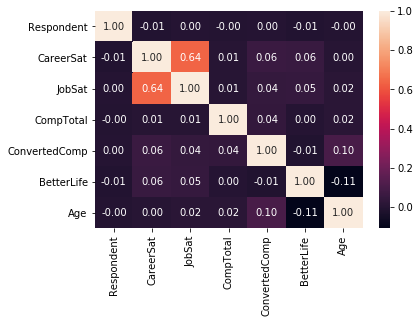

In [13]:
sns.heatmap(df_relevant.corr(), annot=True, fmt=".2f");

#### Categorical to Measurable
- For categorical variable YearsCode, (which is years a respondent has being coding professionally as a part of work)
- The following code shows the dropping the rows which have extreme low and high values 
    - Less than 1 year = 0 experience
    - More than 50 years = There were only values that also with corresponding actual age as 'less than 50'.

In [14]:
# Removed the extrems values
df_relevant= (df_relevant.query("YearsCodePro != 'Less than 1 year' and YearsCodePro != 'More than 50 years'"))
df_relevant['YearsCodePro']= pd.to_numeric(df_relevant['YearsCodePro'])

- Group the dataframe by India_vs_RestWorld and YearsCode, and get their mean, it automatically ignore the missing or null value.

In [15]:
#Compare selected indicators between India and Rest of the World
comparison = df_relevant.groupby(['India_vs_RestWorld','YearsCodePro']).mean()
comparison

Respondent  CareerSat    JobSat  \
India_vs_RestWorld YearsCodePro                                      
India              1.0           44461.259016   3.657807  3.342857   
                   2.0           45357.356747   3.700000  3.414474   
                   3.0           44803.357853   3.781563  3.504523   
                   4.0           44197.750305   3.739237  3.389095   
                   5.0           45616.816176   3.775298  3.455224   
                   6.0           43688.514911   3.696607  3.484909   
                   7.0           45231.734211   3.802139  3.547170   
                   8.0           40795.247492   3.581633  3.363014   
                   9.0           41990.489510   3.546099  3.326241   
                   10.0          46187.859813   3.694175  3.320388   
                   11.0          49923.059701   3.681818  3.338462   
                   12.0          41624.216216   3.564815  3.411215   
                   13.0          48374.280000   3.530612  3.291667   
                   14.0          42138.750000   3.571429  3.476190   
                   15.0          42361.603175   3.733333  3.389831   
                   16.0          40243.315789   3.526316  3.315789   
                   17.0           7207.000000   5.000000  5.000000   
                   18.0          37086.925926   3.923077  3.640000   
                   19.0          34869.904762   3.842105  3.631579   
                   20.0          37746.136364   4.428571  3.761905   
                   21.0          42201.142857   4.076923  4.307692   
                   22.0          47242.529412   3.882353  4.000000   
                   23.0          38009.733333   4.133333  3.642857   
                   24.0          35341.444444   4.333333  3.444444   
                   25.0          69051.111111   4.000000  4.000000   
                   26.0          12296.000000   4.000000  4.000000   
                   27.0          49704.000000   5.000000  5.000000   
                   28.0          73788.000000   5.000000  3.000000   
                   29.0          47794.666667   4.666667  4.000000   
                   30.0          52389.000000   3.666667  4.333333   
...                                       ...        ...       ...   
RestWorld          21.0          43716.234127   4.036961  3.738144   
                   22.0          44681.799689   4.006410  3.734727   
                   23.0          44550.823810   3.978049  3.696822   
                   24.0          42722.169279   4.101307  3.737705   
                   25.0          45271.027737   4.018209  3.740122   
                   26.0          46720.355670   4.164021  3.915344   
                   27.0          42669.608466   4.114754  3.912568   
                   28.0          44277.570755   4.043689  3.710784   
                   29.0          45858.408333   4.247863  3.863248   
                   30.0          44668.207243   4.056367  3.791232   
                   31.0          47027.214953   4.069307  3.732673   
                   32.0          43976.688623   4.036585  3.817073   
                   33.0          42944.062016   4.152000  3.717742   
                   34.0          43510.480392   4.346535  3.969697   
                   35.0          43878.519231   4.171569  3.921182   
                   36.0          46766.102564   4.400000  3.960000   
                   37.0          49287.644068   4.087719  3.877193   
                   38.0          51292.150685   4.250000  3.805556   
                   39.0          46776.857143   4.285714  3.918367   
                   40.0          44674.515464   4.384615  4.142857   
                   41.0          49327.454545   4.809524  4.380952   
                   42.0          47929.208333   3.913043  4.130435   
                   43.0          34968.050000   4.473684  4.388889   
                   44.0          51216.545455   4.272727  4.090909   
                   45.0          42915.437500

## Visualization

   -  Respondent’s salary in the India is much lower than that in Rest of the World no matter how many years one has been coding except some spikes as outliner.

In [16]:
# Drop rows with null values
comparison1= comparison.dropna()

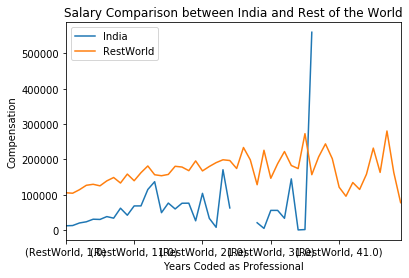

In [17]:
#Plot the compensation Comparison between India and Rest of the World
comparison_graph = comparison1.sort_values(by='YearsCodePro')
comparison.groupby('India_vs_RestWorld')['ConvertedComp'].plot(legend=True)


plt.title("Salary Comparison between India and Rest of the World");
plt.xlabel('Years Coded as Professional')
plt.ylabel('Compensation')
plt.locator_params(axis='x', nbins=5)


 - The lines represent how they India is paid.
 - One can see that Indian are (blue line) underpaid in their whole careers than Rest of the World (green line).
  - except some missing and spikes as outliner.
   

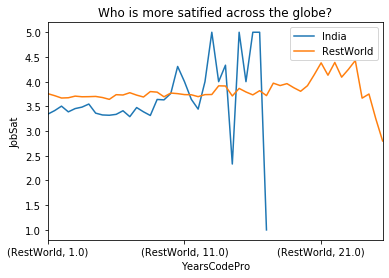

In [18]:
#Plot Respondent opinion Job satisfied acoss India and Rest of the World 
comparison_graph.groupby('India_vs_RestWorld')['JobSat'].plot(legend=True)
plt.title("Who is more satified across the globe?");
plt.xlabel('YearsCodePro')
plt.ylabel('JobSat')
plt.locator_params(axis='x', nbins=4)


Text(0, 0.5, 'Job Satisfaction')

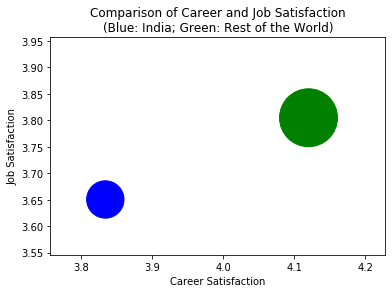

In [19]:
#Plot Comparison of Career and Job Satisfaction between India and Rest

plt.scatter(comparison1.groupby('India_vs_RestWorld').mean().CareerSat, comparison1.groupby('India_vs_RestWorld').mean().JobSat, comparison1.groupby('India_vs_RestWorld').mean().ConvertedComp/50, c=['blue','green'])

plt.title('Comparison of Career and Job Satisfaction\n(Blue: India; Green: Rest of the World)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Job Satisfaction')


- One could see the Rest of the World respondent (Green ball) have a much higher satisfaction on their job and career, positioned at the right-high-up corner. 
- The ball size indicator their average compensation, the blue ball size is much larger than the blue ball (Indian compansation).

## Analysis

#### Comparision of Compansation based on Years a programmer has been coded professionally between the India and Rest of the world. We found that the salary of an Indian respondent is much lower than that of the rest of world no matter how many years they are coded.

- It was observed that there is difference between the Indian and Rest of the world compansation. 
- Also showed that more Indian respondent always think that they are less satified than the Rest of the World no matter how many years they are coded as in a profession.

- Finally, we found that the Career and Job Satisfaction of the World are much higher than those of the Indian Respondent. 
- It may be misleading beacuse of the fact that Indian are paid in Rupee and most of world in West in Dollar and GBP pound.

## Q2. Which programming language is HOT in India and Rest of the World

In [20]:
def filter_country(df, column_filter, country, columns):
    """ 
    Filter a dataframe by country
    
    Parameters:
    df: a dataframe that will be converted, 
    column_filter: country column
    country : Country to filtered
    
    Returns:
    dataframe: a returns filtred datafram
    
    """
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Dataframe filtered by India country with programming language related columns.
Language_India = filter_country(df_relevant, 'India_vs_RestWorld', 'India', ['LanguageWorkedWith', 'LanguageDesireNextYear'])
Language_RestWorld = filter_country(df_relevant, 'India_vs_RestWorld', 'RestWorld', ['LanguageWorkedWith', 'LanguageDesireNextYear'])

In [21]:
def split_column(df, column):
    ''' 
    Split column by ;,
    
    Parameter:
    df: a dataframe that will be converted
    column: to be picked
    
    Return:
    column_series: A splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series

# DataFrame splitted by given column into a Series. 
worked_lang_India = split_column(Language_India, 'LanguageWorkedWith')
desired_lang_India = split_column(Language_India, 'LanguageDesireNextYear')

worked_lang_RestWorld = split_column(Language_RestWorld, 'LanguageWorkedWith')
desired_lang_RestWorld = split_column(Language_RestWorld, 'LanguageDesireNextYear')

In [22]:
def Series2Listarray(array_list):
    ''' 
    Flat a nested list,
    
    Parameter: 
    array_list: and array list
    
    Return:
    objects: A flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# Flatting nested list objects.
India_worked_lang_list = Series2Listarray(worked_lang_India)
India_desired_lang_list = Series2Listarray(desired_lang_India)

RestWorld_worked_lang_list = Series2Listarray(worked_lang_RestWorld)
RestWorld_desired_lang_list = Series2Listarray(desired_lang_RestWorld)

In [23]:
def group_list(lang_list, demography):
    ''' 
    Group by count to a list,
    
    Parameter: 
    data_list: List of lanuages
    demography: demography as in India or Rest Of the The World
    
    returns:
    grouped_dict: a result dict.
    '''
    
    grouped_list = dict(Counter(lang_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'India_vs_RestWorld': demography} for key, value in grouped_list.items()]
    
    return grouped_dict

# Groping a list and creating a dict.
dict_worked_languages_India = group_list(India_worked_lang_list, 'India')
dict_desired_languages_India = group_list(India_desired_lang_list, 'India')

dict_worked_languages_RestWorld = group_list(RestWorld_worked_lang_list, 'RestWorld')
dict_desired_languages_RestWorld = group_list(RestWorld_desired_lang_list, 'RestWorld')

In [24]:
def create_dataframe(data_dicts):
    ''' 
    Create two dataframes and append them,
    
    Parameter:
    data_dicts: data dictionaries.
    
    Return:
    It returns a appended dataframe.
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])

    df = df1.append(df2)
    
    return df

# Creating a Data Frame appending the data.
worked_languages = create_dataframe([dict_worked_languages_India, dict_worked_languages_RestWorld])
desired_languages = create_dataframe([dict_desired_languages_India, dict_desired_languages_RestWorld])

In [25]:
def percentage(df, column):
    ''' 
    Scale data
    
    Parameter: 
    df: dataframe under consideration for worked or desired. 
    column: demograpy i.e. either India or Rest of World
    
    Returns:
    joined_series: data scaled.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series

# Calculating the percentage
worked_languages['Percentage'] = percentage(worked_languages, 'India_vs_RestWorld')
desired_languages['Percentage'] = percentage(desired_languages, 'India_vs_RestWorld')

In [26]:
# Get the top languages
top_worked_lang = worked_languages.sort_values(by=['Percentage'], ascending=False).head(14)['Programming Language'].unique()
top_desired_lang = desired_languages.sort_values(by=['Percentage'], ascending=False).head(14)['Programming Language'].unique()

worked_lang_chart = worked_languages[worked_languages['Programming Language'].isin(top_worked_lang)]
desired_lang_chart = desired_languages[desired_languages['Programming Language'].isin(top_desired_lang)]

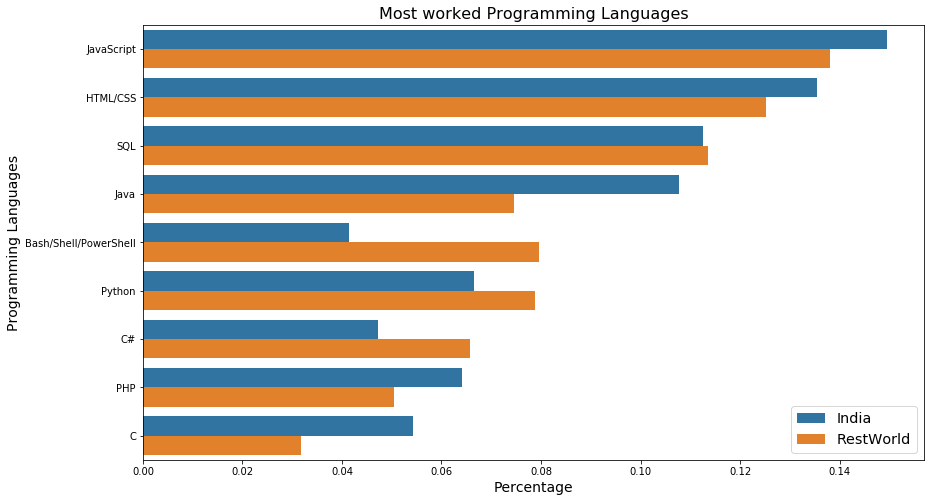

In [27]:
# Figure 1 — Percentage of use of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'India_vs_RestWorld',
            data = worked_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most worked Programming Languages', size = 16)
plt.show()

   ## Visualization and Analysis

   #### Most widely used lanuage by respondent India and Rest of the World is same that are 
       - 1. javaScript
       - 2. HTML/CSS
       - 3. SQL
       - 4. Java
       - 5. Bash/Shell/PowerShell
       
   - Also its worth noting that  India is has **high** percentage of respondent working in **JAVA** and  **C** than Rest of the World
   - However compratively **low** percentage in **Shell** and **Python** 
   

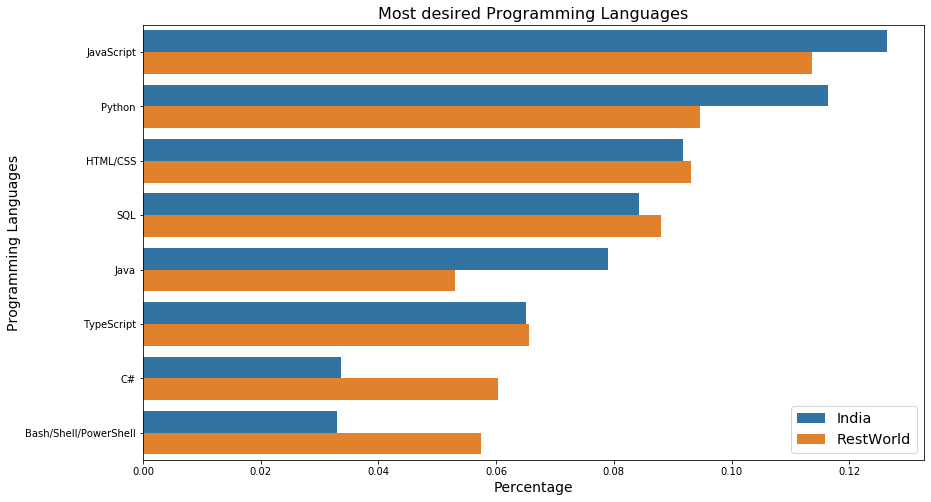

In [28]:
# Figure 2 — Percentage of use of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'India_vs_RestWorld',
            data = desired_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most desired Programming Languages', size = 16)
plt.show()

#### Most desired language in India and Rest of the World
- India is crazy about **Python** now. 
- Python, the fastest-growing major programming language, has risen in the ranks of programming languages in our survey yet again, edging out Java this year and standing as the second most loved language

## Q3. Does Indian Technocrats see as Half Glass Full or Half Glass Empty

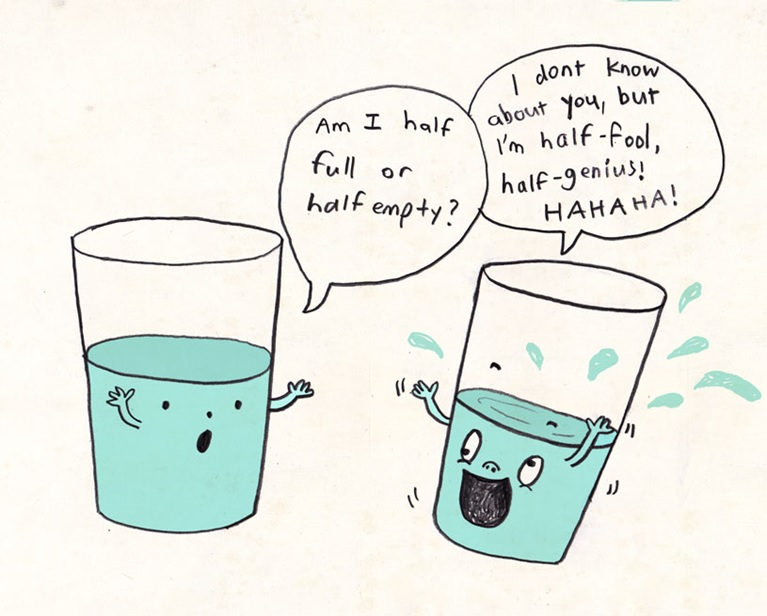

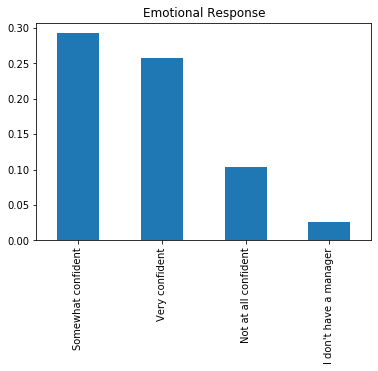

In [29]:
#Display various Manager emotion percieved by underlying reportee  for India
display_bar_chart(df[df['Country'] == 'India'], "MgrIdiot", "Emotional Response")

#### Above bar chart display the emotion for Manager percieved by underlying reportee in India

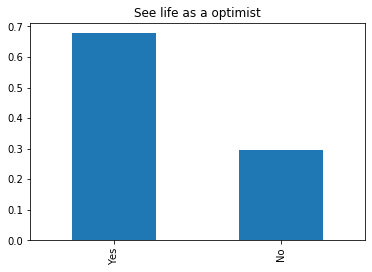

In [30]:
#Display various Unit Test Cases for India
display_bar_chart(df[df['Country'] == 'India'], "BetterLife", "See life as a optimist")

#### Above displays Indian respondant are the most optimistic (more than 65%), believing that people born today will have a better life than their parents. 

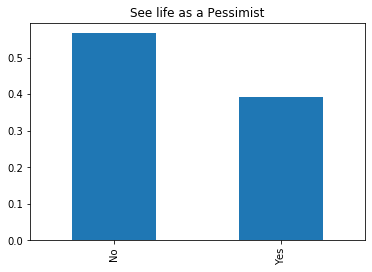

In [31]:
#Display various Unit Test Cases for India
display_bar_chart(df[df['Country'] == 'France'], "BetterLife", "See life as a Pessimist")

#### Outside India  like in France , people are less optimistic about future.

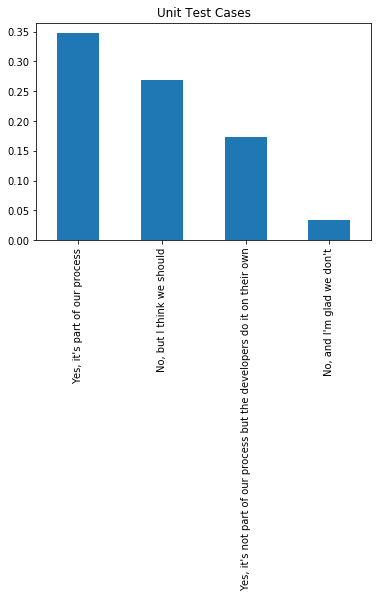

In [32]:
#Display various Unit Test Cases exection status for Rest Of the World
display_bar_chart(Language_RestWorld, "UnitTests", "Unit Test Cases")

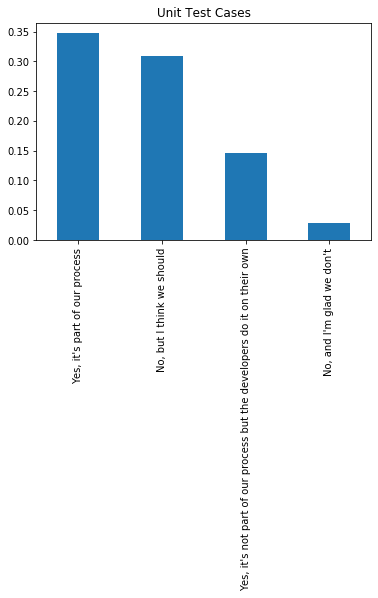

In [33]:
#Display various Unit Test Cases for India
display_bar_chart(Language_India, "UnitTests", "Unit Test Cases")

### Modelling

In [34]:
# Here we can see that none of our variables appear to greatly correlated with salary
# and we can see that if someone was given an expected salary question, they either
# never answered the salary question or they were not given the salary question


# We an still go ahead and make predictions using these variables as a reminder of the 
# scikit learn way of fitting models.  The process is similar to quickly fit models of 
# all types - usually a four step process of - instantiate, fit, predict, score
# In most cases, we also will want to split data into training and test data to assure 
# we are not building models that overfit the data and do not extend well to new situations.

X = df_relevant[[ 'CareerSat', 'JobSat', 'Age']]
y = df['ConvertedComp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

ValueError: Found input variables with inconsistent numbers of samples: [69785, 88883]

In [35]:
### Notice the above breaks because of the NaN values, so we either need to fill or remove them
# Or we could write a conditional model that fits differently 
# depending on the values that are missing - we can see the nans based on the describe above
df_relevant.shape


#________ Video 1 through here on introduction to the data - could do a bit more EDA ________#

(69785, 25)

In [36]:
### The easiest way to move onto a conclusion in a first pass is probably just with dropping

num_vars = df_relevant[['ConvertedComp', 'CareerSat', 'JobSat', 'Age']]
df_dropna = num_vars.dropna(axis=0)

X = df_dropna[['CareerSat', 'JobSat', 'Age']]
y = df_dropna['ConvertedComp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

        
y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.

0.015691786086168058
78903872573.0162


In [37]:
# Whoop - we built a model that predicts... but we are missing by ALOT!
# We can get a quick glimpse of how bad our predictions are...
# This suggests that 3% of the variability in salaries can be explained by these variables...
df_dropna.shape # But it also reduced our dataset to only 5338 rows 
                # ~20% of the original dataset size

(49170, 4)

###  Steps Remaining:
1. Imputation - first results
2. Categorical Variables - improved results, but what is happening?
3. Combat Overfitting - one method

In [38]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,32676.0,127489.492417,-94813.492417
1,150000.0,177980.430111,-27980.430111
2,20844.0,124040.009038,-103196.009038
3,62968.0,117182.722125,-54214.722125
4,46752.0,105208.119369,-58456.119369


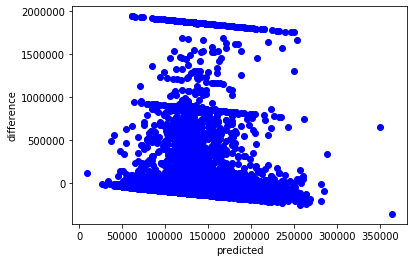

In [39]:
### We can plot how far our predictions are from the actual values compaired to the
### predicted values - you can see that it isn't uncommon for us to miss salaries by
### 150000 and the overpredictions tend to be much worse than the underpredictions
### THere also appears to be a trend where our differences decrease as the predicted
### values increase on the test data.

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

In [40]:
### There are tons of downfalls already - our predictions are pretty poor, we have predictions
### for few of the total values that actually hold salaries, and we are only using 
### quantitative variables to predict.

### Given how bad the predictions are, we might not hurt anything by just filling the missing 
### values to make more predictions.

#Here we fill on the column means
df_fillna = num_vars.apply(lambda x: x.fillna(x.mean()),axis=0)

X = df_fillna[['ConvertedComp', 'CareerSat', 'JobSat', 'Age']]
y = df_fillna['ConvertedComp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

        
y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common


1.0


In [41]:
X.shape

(69785, 4)

In [42]:
### Now we can predict on everything, but our predictions are even worse!

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,131915.273085,131915.273085,1.164153e-10
1,90514.000000,90514.000000,3.085006e-09
2,9900.000000,9900.000000,9.655196e-09
3,131915.273085,131915.273085,-2.910383e-11
4,131915.273085,131915.273085,3.492460e-10


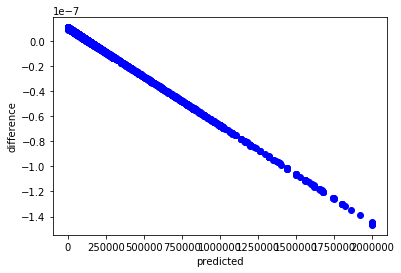

In [43]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

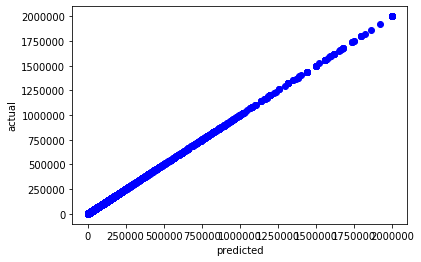

In [44]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual'); #This looks less compelling that we are predicting well...
# I also think I found the mean amount...which aren't real 'actual' salaries

In [45]:
### Some strange line here - probably because we filled in our average for everything
### Which was actually data leakage.  We shouldn't have done this at all. We would likely
### Have to use the mean of the old data to fill in the missing of the future data...

### But this does depend a bit - if on future homes, you will have the x-variables before
### having to predict, this really isn't data leakage, as you would have the abiltiy to update
### the inputed means with each new individual in your dataset.

### Really the values that have the mean value for the salary should be dropped - because
### those are not true salaries.

df_fillna = df_fillna.drop(df_fillna[df_fillna['ConvertedComp'] == np.mean(df['ConvertedComp'])].index)
df_fillna.shape # that's better. we only have this many non-null salaries in our original dataset


(69785, 4)

In [46]:
#Below you can fit a new model with the missing salaries removed

In [47]:
X = df_fillna[['ConvertedComp', 'CareerSat', 'JobSat', 'Age']]
y = df_fillna['ConvertedComp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

        
y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.  


1.0
3.4944008103152354e-16


In [48]:
### Now we can predict on everything, but our predictions are even worse!

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.shape

(20936, 3)

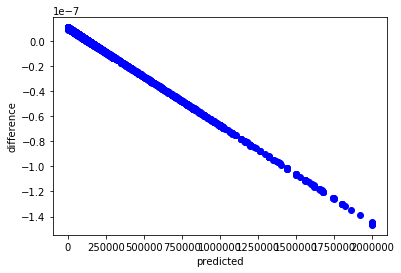

In [49]:
plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

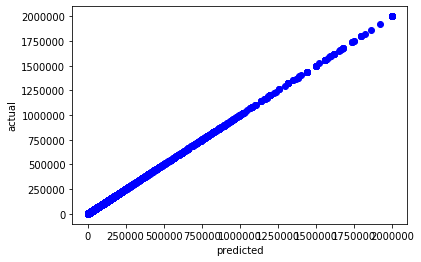

In [50]:
### When we see fan like shapes in the residual plots like this - it often suggests
### we might make better predictions on the log of the response

plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual'); #there appears to be a slight positive trend like we would want to see

In [51]:
### Let's see how we might be able to use categorical variables in our models.
### Though you might try to do something smart to reduce the feature space of your
### x-matrix (like find curved relationships that exist in salary comparing across categories).
### It is probably easier to just blindly encode all of the categorical variables as dummy
### variables in our models.

cat_vars_int = df_relevant.select_dtypes(include=['object']).copy().columns
# http://pbpython.com/categorical-encoding.html

len(cat_vars_int)

17

In [52]:
### Now that we have a list of all the dummy variables we might be interested in... 
### Let's dummy code them, so that we can use them in our machine learning models
### you can do this with pandas (get dummies) or with sklearn (one hot encoding)
### Feel free to use whatever you are comfortable with

In [53]:
for var in  cat_vars_int:
    # for each cat add dummy var, drop original column
    df_relevant = pd.concat([df_relevant.drop(var, axis=1), pd.get_dummies(df_relevant[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

df_relevant.describe()

,Respondent,YearsCodePro,CareerSat,JobSat,CompTotal,ConvertedComp,BetterLife,Age,MainBranch_I am a student who is learning to code,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work",...,LanguageDesireNextYear_VBA;Other(s):,LanguageDesireNextYear_WebAssembly,LanguageDesireNextYear_WebAssembly;Other(s):,"Gender_Man;Non-binary, genderqueer, or gender non-conforming","Gender_Non-binary, genderqueer, or gender non-conforming",Gender_Woman,Gender_Woman;Man,"Gender_Woman;Man;Non-binary, genderqueer, or gender non-conforming","Gender_Woman;Non-binary, genderqueer, or gender non-conforming",India_vs_RestWorld_RestWorld
count,69785.000000,65791.000000,65149.000000,64847.000000,5.141600e+04,5.131000e+04,67905.000000,63048.000000,69785.000000,69785.000000,...,69785.000000,69785.000000,69785.000000,69785.000000,69785.000000,69785.000000,69785.000000,69785.000000,69785.000000,69785.000000
mean,44455.568833,8.684197,3.960752,3.683393,6.003935e+11,1.319153e+05,0.625919,31.800403,0.030250,0.088214,...,0.000043,0.001232,0.000086,0.001834,0.006090,0.065687,0.001103,0.000645,0.001490,0.902859
std,25667.763628,7.440662,1.163815,1.251128,7.648017e+13,2.875329e+05,0.483888,8.489401,0.171276,0.283608,...,0.006557,0.035084,0.009272,0.042789,0.077802,0.247737,0.033199,0.025386,0.038576,0.296152
min,3.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22187.000000,3.000000,4.000000,3.000000,2.500000e+04,2.886000e+04,0.000000,26.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,44454.000000,6.000000,4.000000,4.000000,6.600000e+04,6.000000e+04,1.000000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,66714.000000,12.000000,5.000000,5.000000,1.250000e+05,1.042630e+05,1.000000,36.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,88883.000000,50.000000,5.000000,5.000000,1.000000e+16,2.000000e+06,1.000000,99.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:


### Because we have more rows than number of variables, it is actually possible
### for us to build a model that uses all of the columns to predict the response...
### Whether this is actually a good idea or not is up for debate - let's maybe
### choose some variables that seem like they might be related to salary and go from there.

### You can also see that the nulls are still dropped after dummy encoding, which means
### we will again need to figure out what to do with rows where those values are null.
### It might be okay to just use the mode of the dataset to fill in those values - though
### in reality, a lack of answer is maybe an indication that your answer is different 
### from the group and therefore, you didn't want to answer the question.

### We know there are some non-NaN salaries to predict based on the previous model - so we
### want to make sure we can predict all of these salaries with our new model as well,
### I would like to try and keep the interpretability of the features as much as possible... 
### so I am just going to use the original features. 

### We could try even adding interactions or other combinations of these features, but again
### this would make our features less interpretable. So you have to weigh the pros and cons
### of adding these features.

In [55]:
df_result = pd.concat([df_relevant, df_fillna], axis=1, join='inner')
df_result.shape

(69785, 50671)

In [56]:
df_result['ConvertedComp'].head()['ConvertedComp']

,ConvertedComp,ConvertedComp
2,8820.0,8820.000000
4,NaN,131915.273085
5,366420.0,366420.000000
6,NaN,131915.273085
8,95179.0,95179.000000


In [57]:
df_result = df_result.iloc[:,~df_result.columns.duplicated()]

In [58]:
df_result.shape

(69785, 50667)

In [59]:
### Now we have no duplicated columns, we can focus on which of our new columns (and the 
### previously used columns) we would like to use to try and predict the response.  We might
### just go based on intuition, or we could try to find the variables that are most correlated
### Don't get too high of hopes - having a quant variable correlated with a 1-0 variable
### is not really what correlation coefficients are designed to detect.  They are meant
### to find linear relationships between quant variables. Though correlations are not built for
### finding these relations - they can still give a sense of which variables are best related


### Actually if you try to build the correlation matrix... it might run for a long time, and
### not be very legible anyway... Let's just fit some stuff that seems interesting 
### and intuitive.

In [60]:
### Given how many columns we have to use - let's just drop all of the columns that have any
### missing values

df_result = df_result.dropna(axis=1, how='any')

In [61]:
df_result.shape # which is a few only 7 , sooo that kind of sucks at narrowing down this mess...

(69785, 50660)

In [65]:
df_result.head(1)

,Respondent,MainBranch_I am a student who is learning to code,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work",MainBranch_I code primarily as a hobby,"MainBranch_I used to be a developer by profession, but no longer am","Employment_Independent contractor, freelancer, or self-employed",Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,...,LanguageDesireNextYear_VBA;Other(s):,LanguageDesireNextYear_WebAssembly,LanguageDesireNextYear_WebAssembly;Other(s):,"Gender_Man;Non-binary, genderqueer, or gender non-conforming","Gender_Non-binary, genderqueer, or gender non-conforming",Gender_Woman,Gender_Woman;Man,"Gender_Woman;Man;Non-binary, genderqueer, or gender non-conforming","Gender_Woman;Non-binary, genderqueer, or gender non-conforming",India_vs_RestWorld_RestWorld
2,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

        
y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.  
# Filling in the missing values does appear to have helped based on a preliminary check


1.0
3.4944008103152354e-16


In [69]:
print(r2_score(y_train, lm_model.predict(X_train)))
print(mean_squared_error(y_train, lm_model.predict(X_train))) # What does this mean?

1.0
3.7606356563457883e-16


To combat the overfitting we have a number of options, but one way that would also reduce our run time would be to remove columns from our dataframe.  You will notice that sklearn does not provide pvals back for our coefficients, but it performs ridge regression by default.  So, therefore, we can consider that columns that have larger coefficients are also more useful for predicting our response variable.  How large is large enough to consider keeping? Well, that is a great question, and I also don't have a great answer...  We can try some stuff and see what works. 

Then we can also run cross-validation and aggregate our results to combat the overfitting we saw earlier using this reduced X matrix.

In [70]:
# You could deal with these rare events in different ways - you could consider them as great predictors
# I am going to remove them - as I feel like they are likely not that indicative of other individuals
# I want to find overriding truths about the individuals who receive particular salaries.
# So, let's only consider columns where there are more than 1000 of the level of interest in the column.

reduce_X = X.iloc[:, np.where((X.sum() > 10) == True)[0]]
reduce_X.shape

(69785, 4)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train) # If this model was to predict for new individuals, we probably would want
               # worry about train/test splits and cross-validation, but for now I am most 
               # interested in finding a model that just fits all of the data well

        
y_test_preds = lm_model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.  
## Filling in the missing values does appear to have helped based on a preliminary check

1.0
3.4944008103152354e-16


In [72]:
print(r2_score(y_train, lm_model.predict(X_train))) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_train, lm_model.predict(X_train))) #metrics to assess fit include Rsquared and MSE.  
## Filling in the missing values does appear to have helped based on a preliminary check

1.0
3.7606356563457883e-16


In [73]:
### Let's see what be the best number of features to use based on the test set performance
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:
        
        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True) 
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)
        
        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()
        
    best_cutoff = max(results, key=results.get)
    
    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True) 
    lm_model.fit(X_train, y_train)
        
    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

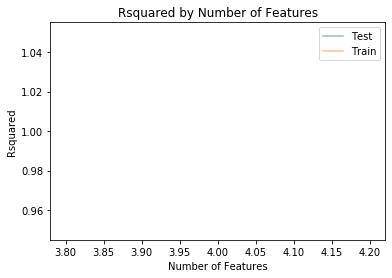

In [75]:
#cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [76]:
### Now that we have the best model in terms of the r2 on the test data, we can use this model to see which features
### appear to be most important, and what impact they have on salary.

X_train.shape # we have 4 features in the optimal model - let's look at some of them


(48849, 4)

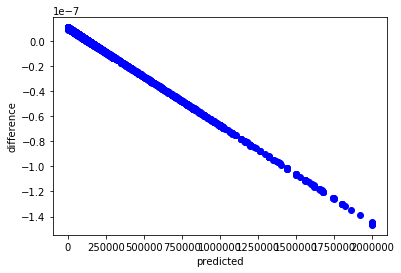

In [77]:
y_test_preds = lm_model.predict(X_test)

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

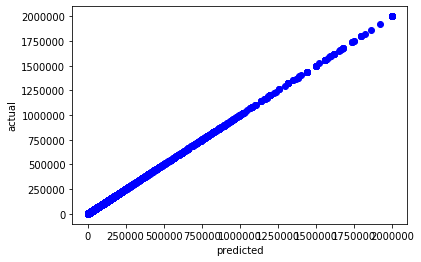

In [78]:
plt.plot(preds_vs_act['preds'], preds_vs_act['actual'], 'bo');
plt.xlabel('predicted');
plt.ylabel('actual'); #there appears to be a slight positive trend like we would want to see

In [79]:
coefs_df = pd.DataFrame()

coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = lm_model.coef_
coefs_df['abs_coefs'] = np.abs(lm_model.coef_)

coefs_df.sort_values('abs_coefs', ascending=False).head(20)

,est_int,coefs,abs_coefs
0,ConvertedComp,1.000000e+00,1.000000e+00
2,JobSat,5.480884e-11,5.480884e-11
3,Age,2.123123e-11,2.123123e-11
1,CareerSat,1.810203e-11,1.810203e-11


In [80]:
lm_model.intercept_

-1.1204974725842476e-08

In [83]:
X_train.shape, sum(X_train['Professional_Professional developer'])


KeyError: 'MainBranch == Professional developer'

In [84]:
### One of the best out of the box methods for supervised machine learning
### is known as the RandomForest - let's see if we can use this model to outperform
### The linear model from earlier.

from sklearn.ensemble import RandomForestRegressor

### Let's see what be the best number of features to use based on the test set performance
def find_optimal_rf_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    kwargs - include the arguments you want to pass to the rf model
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    rf_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:
        
        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response

        rf_model = RandomForestRegressor()  #no normalizing here, but could tune other hyperparameters
        rf_model.fit(X_train, y_train)
        y_test_preds = rf_model.predict(X_test)
        y_train_preds = rf_model.predict(X_train)
        
        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()
        
    best_cutoff = max(results, key=results.get)
    
    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    rf_model = RandomForestRegressor() 
    rf_model.fit(X_train, y_train)
        
    return r2_scores_test, r2_scores_train, rf_model, X_train, X_test, y_train, y_test

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

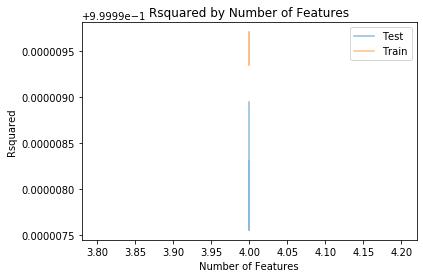

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [85]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_rf_mod(X, y, cutoffs)

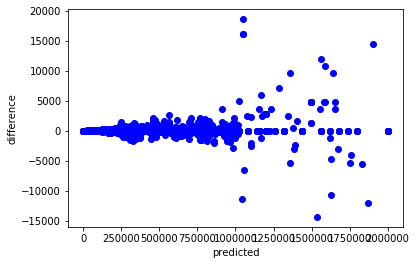

In [86]:
y_test_preds = rf_model.predict(X_test)

preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']

plt.plot(preds_vs_act['preds'], preds_vs_act['diff'], 'bo');
plt.xlabel('predicted');
plt.ylabel('difference');

In [ ]:
#Looks like this overfits quite a bit... 

In [87]:
from sklearn.model_selection import GridSearchCV

### Let's see what be the best number of features to use based on the test set performance
def find_optimal_rf_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True, param_grid=None):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    kwargs - include the arguments you want to pass to the rf model
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    rf_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''

    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        if param_grid==None:
            rf_model = RandomForestRegressor()  #no normalizing here, but could tune other hyperparameters

        else:
            rf_inst = RandomForestRegressor(n_jobs=-1, verbose=1)
            rf_model = GridSearchCV(rf_inst, param_grid, n_jobs=-1) 
            
        rf_model.fit(X_train, y_train)
        y_test_preds = rf_model.predict(X_test)
        y_train_preds = rf_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()
        
    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    if param_grid==None:
        rf_model = RandomForestRegressor()  #no normalizing here, but could tune other hyperparameters

    else:
        rf_inst = RandomForestRegressor(n_jobs=-1, verbose=1)
        rf_model = GridSearchCV(rf_inst, param_grid, n_jobs=-1) 
    rf_model.fit(X_train, y_train)
     
    return r2_scores_test, r2_scores_train, rf_model, X_train, X_test, y_train, y_test

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    8.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.3s
[Parallel(n_jo

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)

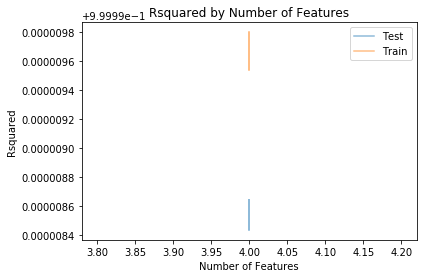

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    8.8s finished


In [88]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]
params = {'n_estimators': [10, 100, 1000], 'max_depth': [1, 5, 10, 100]}
r2_test, r2_train, rf_model, X_train, X_test, y_train, y_test = find_optimal_rf_mod(X, y, cutoffs, param_grid=params)